In [89]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [55]:
#Levantamos el df_final2
df_final2 = pd.read_csv('df_final2.csv')

#Generamos el X y el target
X = df_final2.drop(['target'], axis = 1)
y = df_final2['target']

#Divimos en train y en test
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size= 0.25)

#Estandarizamos con MinMax
scaler = MinMaxScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [70]:
# Buscamos los mejores hiperparametros

#model = LogisticRegression()
#solvers = ['newton-cg', 'lbfgs', 'liblinear']
#penalty = ['l2']
#c_values = [100, 10, 1.0, 0.1, 0.01]

# Defnimos una grilla con GridSearch

#grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
#grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
#grid_result = grid_search.fit(X_train_std, y_train)

# Vemos los resultados

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

In [56]:
#Instanciamos el modelo y los ajustamos a los datos de entrenamiento
model = LogisticRegression(C=10, penalty = 'l2', solver= 'liblinear')
model.fit(X_train_std, y_train)

LogisticRegression(C=10, solver='liblinear')

In [68]:
#Para UN solo fold
#Hacemos las predicciones necesarias
y_pred = model.predict(X_test_std)
print(y_pred)
#Evaluamos el score
print('')
print('Score: ', accuracy_score(y_test, y_pred))

[32. 22. 21. 22. 21. 32. 22. 32. 22. 22. 21. 22. 21. 22. 21. 22. 21. 22.
 21. 32. 22. 21. 21. 21. 22. 21. 22. 21. 22. 22. 21. 21. 22. 22. 22. 21.
 32. 22. 22. 32. 22. 21. 22. 22. 22. 22. 21. 22. 22. 32. 22. 22. 22. 22.
 22. 21. 22. 21. 22. 32. 22. 32. 32. 32. 32. 32. 21. 32. 22. 32. 32. 21.
 21. 21. 21. 22. 22. 32. 22. 22. 22. 22. 22. 22. 22. 32. 22. 22. 21. 32.
 32. 22. 32. 21. 21. 22. 22. 22. 22. 22. 32. 32. 21. 21. 22. 21. 22. 22.
 22. 21. 21. 21. 22. 22. 32. 21. 32. 21. 22. 22. 32. 21. 21. 32. 32. 22.
 22. 21. 32. 21. 22. 22. 22. 22. 22. 22. 22. 21. 32. 32. 22. 22. 32. 22.
 22. 22. 22. 22. 21. 22. 21. 22. 22. 21. 32. 22. 21. 32. 32. 21. 32. 22.
 21. 21. 22. 21. 22. 22. 32. 32. 22. 22. 22. 21. 22. 22. 22. 21. 22. 22.
 21. 21. 21. 21. 22. 22. 21. 22. 21. 21. 32. 21. 21. 21. 21. 21. 21. 22.]

Score:  0.43434343434343436


In [69]:
#Generalizamos para 20 folds
stratifiedkf=StratifiedKFold(n_splits=20)
score=cross_val_score(model,X_train_std,y_train,cv=stratifiedkf)
print("Los scores obtenidos son {}".format(score))
print("El promedio es :{}".format(score.mean()))

C:\Users\DataScience\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=20.
  warnings.warn(


Los scores obtenidos son [0.4        0.46666667 0.3        0.4        0.43333333 0.5
 0.3        0.46666667 0.43333333 0.5        0.53333333 0.6
 0.5        0.37931034 0.34482759 0.48275862 0.37931034 0.44827586
 0.44827586 0.65517241]
El promedio es :0.4485632183908046


In [75]:
model.coef_

[[ 2.11173742  1.77529451  1.04297418 -1.10421017 -1.88964916 -0.66499926
  -0.84084033 -1.70825091  1.12530378 -1.99436696  1.13657693  1.61901482
  -1.12630448  1.65729266  1.0407433   1.10024371  0.31948023  1.05105177
  -0.4113094   1.30183256 -2.39369877  0.39412381 -1.46789627 -0.12352175
  -0.06022317 -1.06800098 -0.96670693 -1.11673447 -2.48102705 -0.25362343
  -0.06305978 -1.4014787 ]
 [ 1.1842816   1.18287407 -0.63965656 -1.99769286 -0.03718663 -1.48434419
   2.20075931  2.51745967 -3.84190284 -0.48201602  0.94995792  0.3386151
   0.62765343 -1.00532999  0.98589671 -0.97466002  1.35738645 -0.64301714
  -0.90786606  2.10042705 -0.78805311  0.71212175  0.73452087 -0.60334646
   0.67960601 -0.17241518 -1.41849164  0.04589751 -0.64079353 -1.77916631
  -1.09060564 -1.08936543]
 [-1.31725419 -0.17167887  0.26796717  1.90462791 -1.63134449 -2.85150119
  -0.61441595 -2.64543503 -0.14942523  3.4750669  -1.13999165 -1.17476101
   2.45418581  0.95857846  0.0582946   0.58453339  0.873272

In [97]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Oranges',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

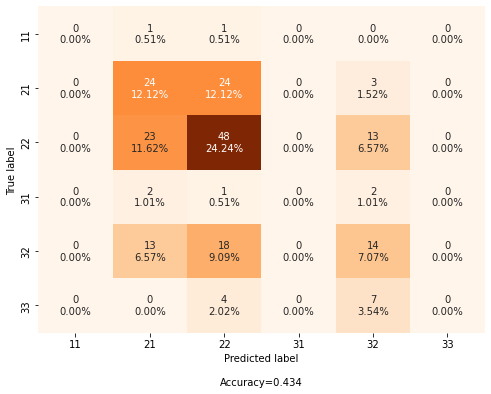

In [112]:
make_confusion_matrix(cf_matrix, categories= [11,21,22,31,32,33] , figsize=(8,6), cbar=False)

In [ ]:
################################################################################################################################

In [118]:
#Hagamos regresion logística con el data set alternativo
#Levantamos el df_final2
df_final_alternativo = pd.read_csv('df_final_alternativo.csv')

#Generamos el X y el target
Xa = df_final_alternativo.drop(['ClasificacionNum2'], axis = 1)
ya = df_final_alternativo['ClasificacionNum2']

#Divimos en train y en test
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya, stratify=ya, test_size= 0.25)

#Estandarizamos con MinMax
scaler = MinMaxScaler()

Xa_train_std = scaler.fit_transform(Xa_train)
Xa_test_std = scaler.fit_transform(Xa_test)

In [119]:
# Buscamos los mejores hiperparametros

modelo = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Defnimos una grilla con GridSearch

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
grid_search = GridSearchCV(estimator=modelo, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xa_train_std, ya_train)

# Vemos los resultados

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.752006 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.745274 (0.028197) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.745829 (0.029810) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.752006 (0.033039) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.749751 (0.033597) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.750301 (0.031684) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.750311 (0.029620) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.751431 (0.032823) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.751431 (0.032823) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.740763 (0.027780) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.727290 (0.025635) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.727290 (0.025635) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.731221 (0.025176) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.695281 (0.014536) wit

In [120]:
#Instanciamos el modelo y los ajustamos a los datos de entrenamiento
modelo = LogisticRegression(C=100, penalty = 'l2', solver= 'liblinear')
modelo.fit(Xa_train_std, ya_train)

LogisticRegression(C=100, solver='liblinear')

In [122]:
#Para UN solo fold
#Hacemos las predicciones necesarias
ya_pred = modelo.predict(Xa_test_std)
print(ya_pred)
#Evaluamos el score
print('')
print('Score: ', accuracy_score(ya_test, ya_pred))

[20 20 20 20 30 20 30 20 20 20 20 20 20 20 20 20 30 20 20 30 20 20 20 20
 30 20 30 20 20 20 20 20 20 20 20 30 20 30 20 30 20 20 30 20 20 20 20 20
 20 20 20 30 20 20 20 20 20 20 30 20 20 20 30 20 20 20 20 30 30 20 20 30
 20 20 20 20 20 30 20 20 30 20 20 20 30 20 30 20 30 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 30 20 20 20 20 20 20 20 30 20 20 20 30 20 30 30
 20 20 20 20 30 20 20 30 20 20 20 20 20 30 30 20 30 20 30 20 20 20 30 20
 20 20 20 20 20 20 30 30 20 20 20 30 20 20 20 20 30 20 20 20 20 30 20 20
 20 20 20 20 20 30 20 20 20 30 20 20 30 20 20 20 30 20 30 20 20 20 20 20
 20 20 20 20 20 20 20]

Score:  0.7386934673366834


In [123]:
#Generalizamos para 20 folds
stratifiedkf=StratifiedKFold(n_splits=20)
score=cross_val_score(modelo,Xa_train_std,ya_train,cv=stratifiedkf)
print("Los scores obtenidos son {}".format(score))
print("El promedio es :{}".format(score.mean()))

C:\Users\DataScience\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=20.
  warnings.warn(


Los scores obtenidos son [0.73333333 0.76666667 0.73333333 0.83333333 0.73333333 0.76666667
 0.7        0.8        0.7        0.73333333 0.7        0.7
 0.73333333 0.8        0.68965517 0.75862069 0.79310345 0.79310345
 0.75862069 0.75862069]
El promedio es :0.7492528735632182


In [129]:
cf_matrix_a = confusion_matrix(ya_pred,ya_test)

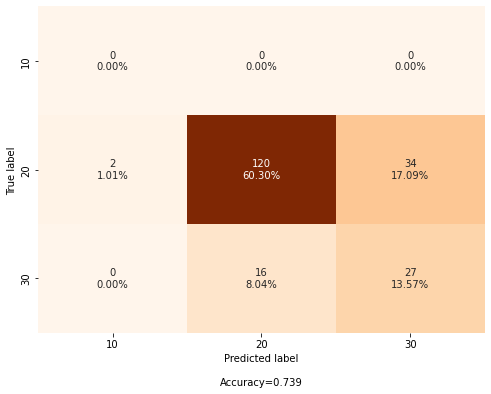

In [130]:
make_confusion_matrix(cf_matrix_a, categories= [10,20,30] , figsize=(8,6), cbar=False)